# Homework 1

### Completed by Jon Kastelan (jlk635)

Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

_________________________

*Your answer here.*

Intepretability is important in being able to analyze factors related to the classification homelessness.

We prefer to use decision trees to identify factors which contribute to likelihood of individuals being classified as homeless. Examples of such factors may include poverty, unemployment, lack of affordable housing, poor physical or mental health, drug and alcohol abuse, gambling, family and relationship breakdown, domestic violence, physical and/or sexual abuse. There may also be others.

Homelessness is a very sensitive issue, and equally the factors may involve sensitive personal data (such as health conditions). Intepretability is an important attribute where documentation and rationale are needed for the decision-making (other than a reason like "the model told me to do it"). 

The homelessness challenge, and classification could foreseeably end up requiring relitigation, or with numerous different departments and agencies who would like to understand reasons for decisions. A highly complex or black-box model such as random forests is less appropriate in this case. It is preferred to use decision trees.
_________________________

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

_________________________

*Your answer here.*

A real-world and urban problem for which accuracy is paramount would be using image processing and biometric information to identify terrorist activity.

One could think of this as.. we don't care what techniques the model/s need to apply to get the correct answer; we just want to make sure the answer is correct. It is an example where the cost of a true negative may be egregious and defamatory, however the cost to society of a false positive would be even worse (dire). Such a misclassification could result in significant damage of property and loss of life.

For this type of problem, authorities and the public aren't asking how they could intepret the model; they want assurance that the model in correct. Model accuracy is paramount, moreso than interpretability.

_________________________

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)


_____________________

*Your answer here.*

Two suggestions for getting interpretability out of a random forest classifier model post-processing:

1. Decompose predictions into mathematically exact feature contributions. This will provide classifications, along with specifying relative importance of features used for the classification / prediction.
2. Crucial to evaluate whether the displayed global and local explanations are reasonable. Explanations should inspire trust and confidence in the technique. If this is not the case, users are encouraged to remove potentially problematic features from the original data and retrain the model

_____________________


###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
from StringIO import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [10]:


# Code sourced from:
# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python

unique, counts = np.unique(df.MPG, return_counts=True)
dict(zip(unique, counts))



(15, 5)

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [38]:
# your code here

## Possible binary questions to ask about number of cylinders

uniqueCylinders, countsCylinders = np.unique(df.cylinders, return_counts=True)

for i in uniqueCylinders:
    print("Is the number of cylinders '{}'?".format(i))
    
    yesDf = df[df.cylinders == i]
    noDf = df[df.cylinders != i]
    
    uniqueY, countsY = np.unique(yesDf.MPG, return_counts=True)
    classY = dict(zip(uniqueY, countsY))
    
    uniqueN, countsN = np.unique(noDf.MPG, return_counts=True)
    classN = dict(zip(uniqueN, countsN))
    
    yG = classY.get('good', 0)
    yB = classY.get('bad', 0)
    nG = classN.get('good', 0)
    nB = classN.get('bad', 0)
    
    infGainCalc = round(InformationGain(yG, yB, nG, nB), 4) 
    
    print("The information gain is: {}".format(infGainCalc))
    print("For yes, there are {} good, and {} bad vehicles".format(yG, yB))
    print("For no, there are {} good, and {} bad vehicles \n".format(nG, nB))



Is the number of cylinders '4'?
The information gain is: 0.3653
For yes, there are 5 good, and 4 bad vehicles
For no, there are 0 good, and 11 bad vehicles 

Is the number of cylinders '6'?
The information gain is: 0.1531
For yes, there are 0 good, and 6 bad vehicles
For no, there are 5 good, and 9 bad vehicles 

Is the number of cylinders '8'?
The information gain is: 0.1226
For yes, there are 0 good, and 5 bad vehicles
For no, there are 5 good, and 10 bad vehicles 



In [39]:
## Possible binary questions to ask about weight of vehicle

uniqueWeight, countsWeight = np.unique(df.weight, return_counts=True) 

for i in uniqueWeight:
    print("Is the weight of the vehicle '{}'?".format(i))
    
    yesDf = df[df.weight == i]
    noDf = df[df.weight != i]
    
    uniqueY, countsY = np.unique(yesDf.MPG, return_counts=True)
    classY = dict(zip(uniqueY, countsY))
    
    uniqueN, countsN = np.unique(noDf.MPG, return_counts=True)
    classN = dict(zip(uniqueN, countsN))
    
    yG = classY.get('good', 0)
    yB = classY.get('bad', 0)
    nG = classN.get('good', 0)
    nB = classN.get('bad', 0)
    
    infGainCalc = round(InformationGain(yG, yB, nG, nB), 4) 
    
    print("The information gain is: {}".format(infGainCalc))
    print("For yes, there are {} good, and {} bad vehicles".format(yG, yB))
    print("For no, there are {} good, and {} bad vehicles \n".format(nG, nB))



Is the weight of the vehicle 'light'?
The information gain is: 0.0971
For yes, there are 3 good, and 3 bad vehicles
For no, there are 2 good, and 12 bad vehicles 

Is the weight of the vehicle 'medium'?
The information gain is: 0.0
For yes, there are 2 good, and 6 bad vehicles
For no, there are 3 good, and 9 bad vehicles 

Is the weight of the vehicle 'weighty'?
The information gain is: 0.1531
For yes, there are 0 good, and 6 bad vehicles
For no, there are 5 good, and 9 bad vehicles 



c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [42]:
# your code here

uniqueHP, countsHP = np.unique(df.HP, return_counts=True) 
#uniqueHP

for i in range(len(uniqueHP) - 1):
    midP = 0.5*(uniqueHP[i+1] - uniqueHP[i]) + uniqueHP[i]
    print("Is the vehicle less than {} HP (horsepower)?".format(midP))
    
    yesDf = df[df.HP < midP]
    noDf = df[df.HP >= midP]
    
    uniqueY, countsY = np.unique(yesDf.MPG, return_counts=True)
    classY = dict(zip(uniqueY, countsY))
    
    uniqueN, countsN = np.unique(noDf.MPG, return_counts=True)
    classN = dict(zip(uniqueN, countsN))
    
    yG = classY.get('good', 0)
    yB = classY.get('bad', 0)
    nG = classN.get('good', 0)
    nB = classN.get('bad', 0)
    
    infGainCalc = round(InformationGain(yG, yB, nG, nB), 4) 
    
    print("The information gain is: {}".format(infGainCalc))
    print("For yes, there are {} good, and {} bad vehicles".format(yG, yB))
    print("For no, there are {} good, and {} bad vehicles \n".format(nG, nB))
    



Is the vehicle less than 70.0 HP (horsepower)?
The information gain is: 0.1059
For yes, there are 1 good, and 0 bad vehicles
For no, there are 4 good, and 15 bad vehicles 

Is the vehicle less than 78.0 HP (horsepower)?
The information gain is: 0.2263
For yes, there are 2 good, and 0 bad vehicles
For no, there are 3 good, and 15 bad vehicles 

Is the vehicle less than 83.0 HP (horsepower)?
The information gain is: 0.3671
For yes, there are 3 good, and 0 bad vehicles
For no, there are 2 good, and 15 bad vehicles 

Is the vehicle less than 87.0 HP (horsepower)?
The information gain is: 0.2142
For yes, there are 3 good, and 1 bad vehicles
For no, there are 2 good, and 14 bad vehicles 

Is the vehicle less than 89.5 HP (horsepower)?
The information gain is: 0.3658
For yes, there are 4 good, and 1 bad vehicles
For no, there are 1 good, and 14 bad vehicles 

Is the vehicle less than 91.0 HP (horsepower)?
The information gain is: 0.2759
For yes, there are 4 good, and 2 bad vehicles
For no, th

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

*Your answer here.*

The best split is the one which maximizes the information ratio.

In this case, the question / split which provides the highest information ratio is:

### Is the vehicle less than 92.5 HP (horsepower)?
*The information gain is: 0.5092*

The child nodes produce the following:

For yes, there are 5 good, and 2 bad vehicles

For no, there are 0 good, and 13 bad vehicles 

### For the yes node (i.e. vehicle is less than 92.5 HP), further splitting would be required as we still have 5 good and 2 bad vehicles in this node.



e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [49]:
# your code here

## define a new dataframe 'splitDf' for the vehicles which are less than 92.5 HP
threshold = 92.5
splitDf = df[df.HP < threshold]
splitDf 


,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [45]:
## Part (b) (i)


## Possible binary questions to ask about number of cylinders

uniqueCylinders, countsCylinders = np.unique(splitDf.cylinders, return_counts=True)

for i in uniqueCylinders:
    print("Is the number of cylinders '{}'?".format(i))
    
    yesDf = splitDf[splitDf.cylinders == i]
    noDf = splitDf[splitDf.cylinders != i]
    
    uniqueY, countsY = np.unique(yesDf.MPG, return_counts=True)
    classY = dict(zip(uniqueY, countsY))
    
    uniqueN, countsN = np.unique(noDf.MPG, return_counts=True)
    classN = dict(zip(uniqueN, countsN))
    
    yG = classY.get('good', 0)
    yB = classY.get('bad', 0)
    nG = classN.get('good', 0)
    nB = classN.get('bad', 0)
    
    infGainCalc = round(InformationGain(yG, yB, nG, nB), 4) 
    
    print("The information gain is: {}".format(infGainCalc))
    print("For yes, there are {} good, and {} bad vehicles".format(yG, yB))
    print("For no, there are {} good, and {} bad vehicles \n".format(nG, nB))

Is the number of cylinders '4'?
The information gain is: 0.8631
For yes, there are 5 good, and 0 bad vehicles
For no, there are 0 good, and 2 bad vehicles 

Is the number of cylinders '6'?
The information gain is: 0.8631
For yes, there are 0 good, and 2 bad vehicles
For no, there are 5 good, and 0 bad vehicles 



In [46]:
##Part (b) (ii)

## Possible binary questions to ask about weight of vehicle

uniqueWeight, countsWeight = np.unique(splitDf.weight, return_counts=True) 

for i in uniqueWeight:
    print("Is the weight of the vehicle '{}'?".format(i))
    
    yesDf = splitDf[splitDf.weight == i]
    noDf = splitDf[splitDf.weight != i]
    
    uniqueY, countsY = np.unique(yesDf.MPG, return_counts=True)
    classY = dict(zip(uniqueY, countsY))
    
    uniqueN, countsN = np.unique(noDf.MPG, return_counts=True)
    classN = dict(zip(uniqueN, countsN))
    
    yG = classY.get('good', 0)
    yB = classY.get('bad', 0)
    nG = classN.get('good', 0)
    nB = classN.get('bad', 0)
    
    infGainCalc = round(InformationGain(yG, yB, nG, nB), 4) 
    
    print("The information gain is: {}".format(infGainCalc))
    print("For yes, there are {} good, and {} bad vehicles".format(yG, yB))
    print("For no, there are {} good, and {} bad vehicles \n".format(nG, nB))


Is the weight of the vehicle 'light'?
The information gain is: 0.2917
For yes, there are 3 good, and 0 bad vehicles
For no, there are 2 good, and 2 bad vehicles 

Is the weight of the vehicle 'medium'?
The information gain is: 0.2917
For yes, there are 2 good, and 2 bad vehicles
For no, there are 3 good, and 0 bad vehicles 



In [47]:
## Part (c)

# your code here

uniqueHP, countsHP = np.unique(splitDf.HP, return_counts=True) 
#uniqueHP

for i in range(len(uniqueHP) - 1):
    midP = 0.5*(uniqueHP[i+1] - uniqueHP[i]) + uniqueHP[i]
    print("Is the vehicle less than {} HP (horsepower)?".format(midP))
    
    yesDf = splitDf[splitDf.HP < midP]
    noDf = splitDf[splitDf.HP >= midP]
    
    uniqueY, countsY = np.unique(yesDf.MPG, return_counts=True)
    classY = dict(zip(uniqueY, countsY))
    
    uniqueN, countsN = np.unique(noDf.MPG, return_counts=True)
    classN = dict(zip(uniqueN, countsN))
    
    yG = classY.get('good', 0)
    yB = classY.get('bad', 0)
    nG = classN.get('good', 0)
    nB = classN.get('bad', 0)
    
    infGainCalc = round(InformationGain(yG, yB, nG, nB), 4) 
    
    print("The information gain is: {}".format(infGainCalc))
    print("For yes, there are {} good, and {} bad vehicles".format(yG, yB))
    print("For no, there are {} good, and {} bad vehicles \n".format(nG, nB))
    


Is the vehicle less than 70.0 HP (horsepower)?
The information gain is: 0.076
For yes, there are 1 good, and 0 bad vehicles
For no, there are 4 good, and 2 bad vehicles 

Is the vehicle less than 78.0 HP (horsepower)?
The information gain is: 0.1696
For yes, there are 2 good, and 0 bad vehicles
For no, there are 3 good, and 2 bad vehicles 

Is the vehicle less than 83.0 HP (horsepower)?
The information gain is: 0.2917
For yes, there are 3 good, and 0 bad vehicles
For no, there are 2 good, and 2 bad vehicles 

Is the vehicle less than 87.0 HP (horsepower)?
The information gain is: 0.006
For yes, there are 3 good, and 1 bad vehicles
For no, there are 2 good, and 1 bad vehicles 

Is the vehicle less than 89.5 HP (horsepower)?
The information gain is: 0.0617
For yes, there are 4 good, and 1 bad vehicles
For no, there are 1 good, and 1 bad vehicles 

Is the vehicle less than 91.0 HP (horsepower)?
The information gain is: 0.076
For yes, there are 4 good, and 2 bad vehicles
For no, there are 

*Part (d)*

Again, maximize the information ratio.

In this case, the question / split which provides the highest information ratio is:

### Is the number of cylinders '4'? 
*(or an equivalently similar question "Is the number of cylinders '6'?")*

*The information gain is: 0.8631*

The child nodes produce the following:

For yes, there are 5 good, and 0 bad vehicles

For no, there are 0 good, and 2 bad vehicles 

### Further splitting is not required, as the tree is perfectly classified.




f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Your answer here.

![alt text](https://raw.githubusercontent.com/jkastelan/iHeartCUSPhackDay2017/master/Misc/Decision_tree_visual_MPG.png)


g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light : *classified as* **BAD**

?,6,113,medium : *classified as* **BAD**

?,4,83,weighty : *classified as* **GOOD**

?,4,95,weighty : *classified as* **BAD**


### Question 3, Predicting burden of disease （40 pts)

In [50]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# your code here

## Check data for null values
data.isnull().sum(axis=0)

Country                     0
FrxnPeaceIn10               0
ODA4H2OPcptaDol             0
RenewResm3PcptaYr           0
SustAccImprWatRur           0
SustAccImprWatUrb           0
SustAccImprSanRur           0
SustAccImprSanUrb           0
TotHlthExpPctofGDP          0
GenGovtPctofTotHlthExp      0
ExtResHlthPctTotExpHlth     0
PCptaGovtExpHlthAvgExcRt    0
GDPPCptaIntDol              0
AdultLtrcyRate              0
FemaleLtrcyRate             0
BurdenOfDisease             0
dtype: int64

In [69]:

# Define "BurdenOfDisease" as the target variable. 
y=data.loc[:,"BurdenOfDisease"]
y=pd.get_dummies(y)

# Get the feature space. We're not interested the Country variable; however include all other variables
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]


# Split data into 70% train, 30% test
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
X_train.head()

,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate
7,1.0,0.00,66,0.85149,0.97030,0.99010,0.99010,0.064,0.475,0.002,533,19930,0.94653,0.95545
53,1.0,8.04,317000,0.82178,0.82178,0.59406,0.85149,0.048,0.826,0.032,44,6198,0.97822,0.97525
15,1.0,4.19,9345,0.89109,0.99010,0.24752,0.56436,0.056,0.582,0.029,135,7344,0.79010,0.81584
36,0.4,0.12,25183,0.28713,0.82178,0.22772,0.42574,0.040,0.183,0.151,1,382,0.64851,0.54554
12,1.0,2.87,45564,0.59406,0.85149,0.69307,0.64356,0.031,0.835,0.186,9,2035,0.46535,0.33663


In [105]:
from sklearn.tree import DecisionTreeClassifier

# learn model
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

# in sample accuracy
print 'In sample accuracy:',dt.score(X_train,y_train)

# out of sample accuracy
print 'Out of sample accuracy:',dt.score(X_test,y_test)

In sample accuracy: 1.0
Out of sample accuracy: 0.641025641026


In [106]:
OS=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999) 

for i in range(10):
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test)) # or equivalently: OS.append(dt.score(X_test,y_test))
print np.mean(OS)

0.692307692308


In [142]:

OS_MaxDepth_score = []
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=998)
    
for i in range(1,11):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    # dt.score returns the mean accuracy on the given test data and labels
    scoring=dt.score(X_test,y_test) #score of trained model on test set
    print("For max depth = {}, the score on test set is {}".format(i, round(scoring, 6)))
    OS_MaxDepth_score.append(scoring)
    #AUC_OS.append(roc_auc_score(np.array(y_test),pred))
print "Average out-of-sample score",round(np.mean(OS_MaxDepth_score),4)

For max depth = 1, the score on test set is 0.128205
For max depth = 2, the score on test set is 0.487179
For max depth = 3, the score on test set is 0.564103
For max depth = 4, the score on test set is 0.512821
For max depth = 5, the score on test set is 0.487179
For max depth = 6, the score on test set is 0.487179
For max depth = 7, the score on test set is 0.512821
For max depth = 8, the score on test set is 0.487179
For max depth = 9, the score on test set is 0.487179
For max depth = 10, the score on test set is 0.538462
Average out-of-sample score 0.4692


In [144]:

OS_MaxLeaf_score = []
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=998)
    
for i in range(2,25,1):
    dt=DecisionTreeClassifier(max_leaf_nodes=i)
    dt.fit(X_train,y_train)
    # dt.score returns the mean accuracy on the given test data and labels
    scoring=dt.score(X_test,y_test) #score of trained model on test set
    print("For max leaf nodes = {}, the score on test set is {}".format(i, round(scoring, 6)))
    OS_MaxLeaf_score.append(scoring)
    #AUC_OS.append(roc_auc_score(np.array(y_test),pred))
print "Average out-of-sample score",round(np.mean(OS_MaxLeaf_score),4)

For max leaf nodes = 2, the score on test set is 0.128205
For max leaf nodes = 3, the score on test set is 0.153846
For max leaf nodes = 4, the score on test set is 0.487179
For max leaf nodes = 5, the score on test set is 0.564103
For max leaf nodes = 6, the score on test set is 0.512821
For max leaf nodes = 7, the score on test set is 0.538462
For max leaf nodes = 8, the score on test set is 0.538462
For max leaf nodes = 9, the score on test set is 0.538462
For max leaf nodes = 10, the score on test set is 0.538462
For max leaf nodes = 11, the score on test set is 0.538462
For max leaf nodes = 12, the score on test set is 0.512821
For max leaf nodes = 13, the score on test set is 0.512821
For max leaf nodes = 14, the score on test set is 0.487179
For max leaf nodes = 15, the score on test set is 0.512821
For max leaf nodes = 16, the score on test set is 0.512821
For max leaf nodes = 17, the score on test set is 0.538462
For max leaf nodes = 18, the score on test set is 0.461538
For m

In [175]:
DecisionTreeClassifier?

In [102]:
OS_score

[0.58974358974358976,
 0.64102564102564108,
 0.58974358974358976,
 0.61538461538461542,
 0.66666666666666663,
 0.35897435897435898,
 0.61538461538461542,
 0.58974358974358976,
 0.5641025641025641,
 0.66666666666666663]

In [ ]:
# This time we'll use max_depth to control the complexity of the tree, still using the same train/test split as above,
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print rs.best_params_
print roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1])

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

In [ ]:
import matplotlib.pylab as plt

# your code here

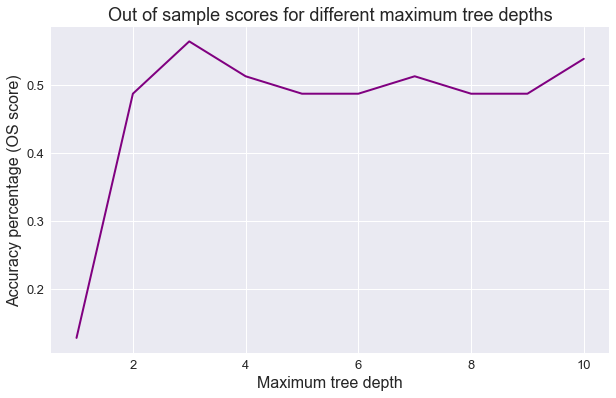

In [147]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),OS_MaxDepth_score, c='purple', lw=2)
plt.title('Out of sample scores for different maximum tree depths', fontsize = 18)
plt.xlabel('Maximum tree depth', fontsize = 16)
plt.ylabel('Accuracy percentage (OS score)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

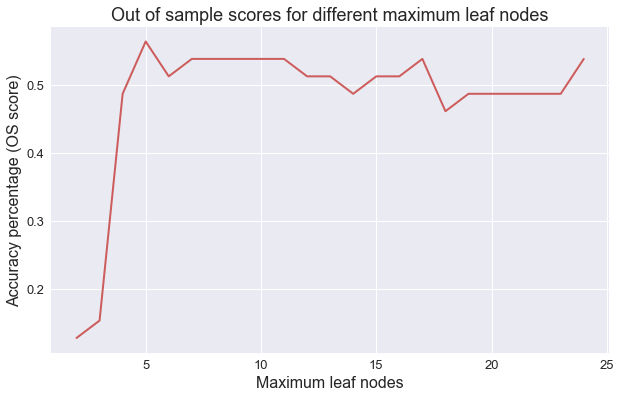

In [148]:
plt.figure(figsize=(10,6))
plt.plot(range(2,25,1),OS_MaxLeaf_score, c='IndianRed', lw=2)
plt.title('Out of sample scores for different maximum leaf nodes', fontsize = 18)
plt.xlabel('Maximum leaf nodes', fontsize = 16)
plt.ylabel('Accuracy percentage (OS score)', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)

dt = DecisionTreeClassifier(random_state=i)

gs = GridSearchCV(dt, param_grid = param_grid)
rs = gs.fit(X_train,y_train)
scoring = rs.score(X_test,y_test) #score of trained model on test set
rs.best_params_['max_depth'], scoring

(6, 0.71794871794871795)

In [174]:
from sklearn.model_selection import GridSearchCV

# your code here

## Lets use a max-depth to control for complexity of the tree.
## Same train/test split as above, and we'll optimise the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}

Tuned_MaxDepth = []
OS_MaxLeaf_score = []


# We use a for loop to randomize our test and train set
for i in range(1,31,1):
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=i)

    dt = DecisionTreeClassifier(random_state=i)

    gs = GridSearchCV(dt, param_grid = param_grid)
    rs = gs.fit(X_train,y_train)
    maxDepthOpt = rs.best_params_['max_depth'] #tuned Max depth for randomized test/train i
    scoring = rs.score(X_test,y_test) #score of trained model on test set
    Tuned_MaxDepth.append(maxDepthOpt)
    #print rs.best_params_
    #print roc_auc_score(np.array(y_test),pred)

    OS_MaxLeaf_score.append(scoring)

ModeTunedMaxDepth = scipy.stats.mode(Tuned_MaxDepth)[0][0]

print("The tuned max depth of the tree is {}.".format(ModeTunedMaxDepth))


The tuned max depth of the tree is 3.


In [183]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 999) 

# Fit decision tree classifier with maximum depth equal to tuned max depth
dt=DecisionTreeClassifier(max_depth = ModeTunedMaxDepth)
dt.fit(X_train,y_train)
osScore = dt.score(X_test,y_test)
print("The out-of-sample fit after tuning for the optimal max depth ({}) is: {}".format(ModeTunedMaxDepth,round(osScore,6)))

The out-of-sample fit after tuning for the optimal max depth (3) is: 0.641026


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [184]:
from sklearn import tree

# your code here
dt=DecisionTreeClassifier(max_depth = ModeTunedMaxDepth)
dt.fit(X_train,y_train)

thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print thestring

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="AdultLtrcyRate <= 0.856, samples = 91, value = [[74, 17], [66, 25], [65, 26], [68, 23]]", fillcolor="#e5813900"] ;
1 [label="GDPPCptaIntDol <= 1094.0, samples = 48, value = [[31, 17], [26, 22], [47, 1], [40, 8]]", fillcolor="#e5813925"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 9, value = [[0, 9], [9, 0], [9, 0], [9, 0]]", fillcolor="#e58139ff"] ;
1 -> 2 ;
3 [label="ExtResHlthPctTotExpHlth <= 0.004, samples = 39, value = [[31, 8], [17, 22], [38, 1], [31, 8]]", fillcolor="#e5813932"] ;
1 -> 3 ;
4 [label="samples = 6, value = [[6, 0], [6, 0], [6, 0], [0, 6]]", fillcolor="#e58139ff"] ;
3 -> 4 ;
5 [label="samples = 33, value = [[25, 8], [11, 22], [32, 1], [31, 2]]", fillcolor="#e5813956"] ;
3 -> 5 ;
6 [label="SustAccImprSanUrb <= 0.842, samples = 43, value = [[43, 0], [40, 3], [18, 25], [28, 15]]", fillcolor="#e5813948

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.